[View in Colaboratory](https://colab.research.google.com/github/aunz/ds/blob/master/Gradient_descent.ipynb)

# Gradient descent

We will use gradient descent to find the intercept and slope for a simple linear regression 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Data creation

1) Create some random data with:
- Intercept  θ<sub>0</sub> = 3
- slope θ<sub>1</sub> = 5

2) Plot the data

3) Determine the intecept and slope with an analytical approach using matrix algebra **θ = (X' X)<sup>-1</sup> X' y**

4) Draw the regression line using theta from step 3

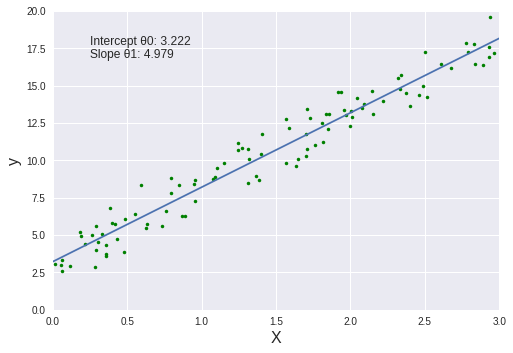

In [94]:
# 1) some random data
np.random.seed(0) # for reproducibility
X = 3 * np.random.rand(100, 1)
y = 3 + 5 * X + np.random.randn(100, 1)

# 2) plot the raw data
plt.plot(X, y, 'g.')
plt.xlabel('X', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis([0, np.ceil(X.max()), 0, np.ceil(y.max())])

# 3) determine theta
X_1 = np.column_stack((np.ones(len(X)), X)) # need to add a column of 1 for X
theta = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y)

# 4) draw the regression line
plt.plot([0, 3], np.dot([[1, 0], [1, 3]], theta))
plt.text(0.25, 17.5, 'Intercept θ0: {0[0]:.3f}\nSlope θ1: {1[0]:.3f}'.format(*theta), va='center');

The intercept (3.222) and slope (4.979) are not exactly the same but close to our pre-chosen intercept (3.0) and slope (5.0), due to random noise we introduced for y.

Now we can implement **gradient descent** and see what theta (intercept and slope) we will get. We will define
- Cost function: difference between the expected and target value
- Gradient

In [0]:
# there are many ways to define a cost function, but in the end it should return a single value
# the cost function below calculate root mean square error (RMSE)
def cost(target, predicted):
    return (1 / (2 * len(target)) ) * np.sum(np.square(predicted - target))

def predict(X, theta):
    # return prediction given X and theta
    X_1 = np.column_stack((np.ones(len(X)), X))
    return np.dot(X_1, theta)

(100, 3)